CHECKING FOR DATASET
Dataset not found locally. Downloading...
Dataset downloaded successfully as WA_Fn-UseC_-Telco-Customer-Churn.csv

STEP 1: DATA LOADING AND EXPLORATION
✓ Dataset loaded successfully!

Dataset shape: (7043, 21)
Number of customers: 7043
Number of features: 21

Column names:
 1. customerID
 2. gender
 3. SeniorCitizen
 4. Partner
 5. Dependents
 6. tenure
 7. PhoneService
 8. MultipleLines
 9. InternetService
10. OnlineSecurity
11. OnlineBackup
12. DeviceProtection
13. TechSupport
14. StreamingTV
15. StreamingMovies
16. Contract
17. PaperlessBilling
18. PaymentMethod
19. MonthlyCharges
20. TotalCharges
21. Churn

First 3 rows of the dataset:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   

      Mult

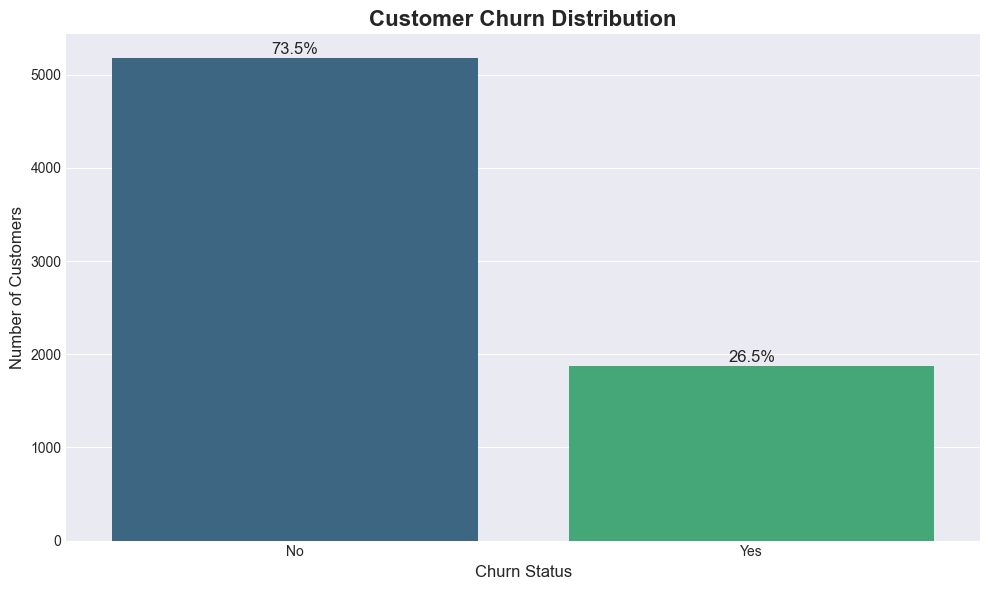


NUMERICAL FEATURES SUMMARY
Numerical columns: ['tenure', 'MonthlyCharges', 'TotalCharges']

Summary statistics:
            tenure  MonthlyCharges
count  7043.000000     7043.000000
mean     32.371149       64.761692
std      24.559481       30.090047
min       0.000000       18.250000
25%       9.000000       35.500000
50%      29.000000       70.350000
75%      55.000000       89.850000
max      72.000000      118.750000

CATEGORICAL FEATURES ANALYSIS
Found 16 categorical features

1. gender:
   Unique values: 2
   Values: ['Female' 'Male']

2. SeniorCitizen:
   Unique values: 2
   Values: [0 1]

3. Partner:
   Unique values: 2
   Values: ['Yes' 'No']

4. Dependents:
   Unique values: 2
   Values: ['No' 'Yes']

5. PhoneService:
   Unique values: 2
   Values: ['No' 'Yes']

DATA TYPES CHECK
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
M

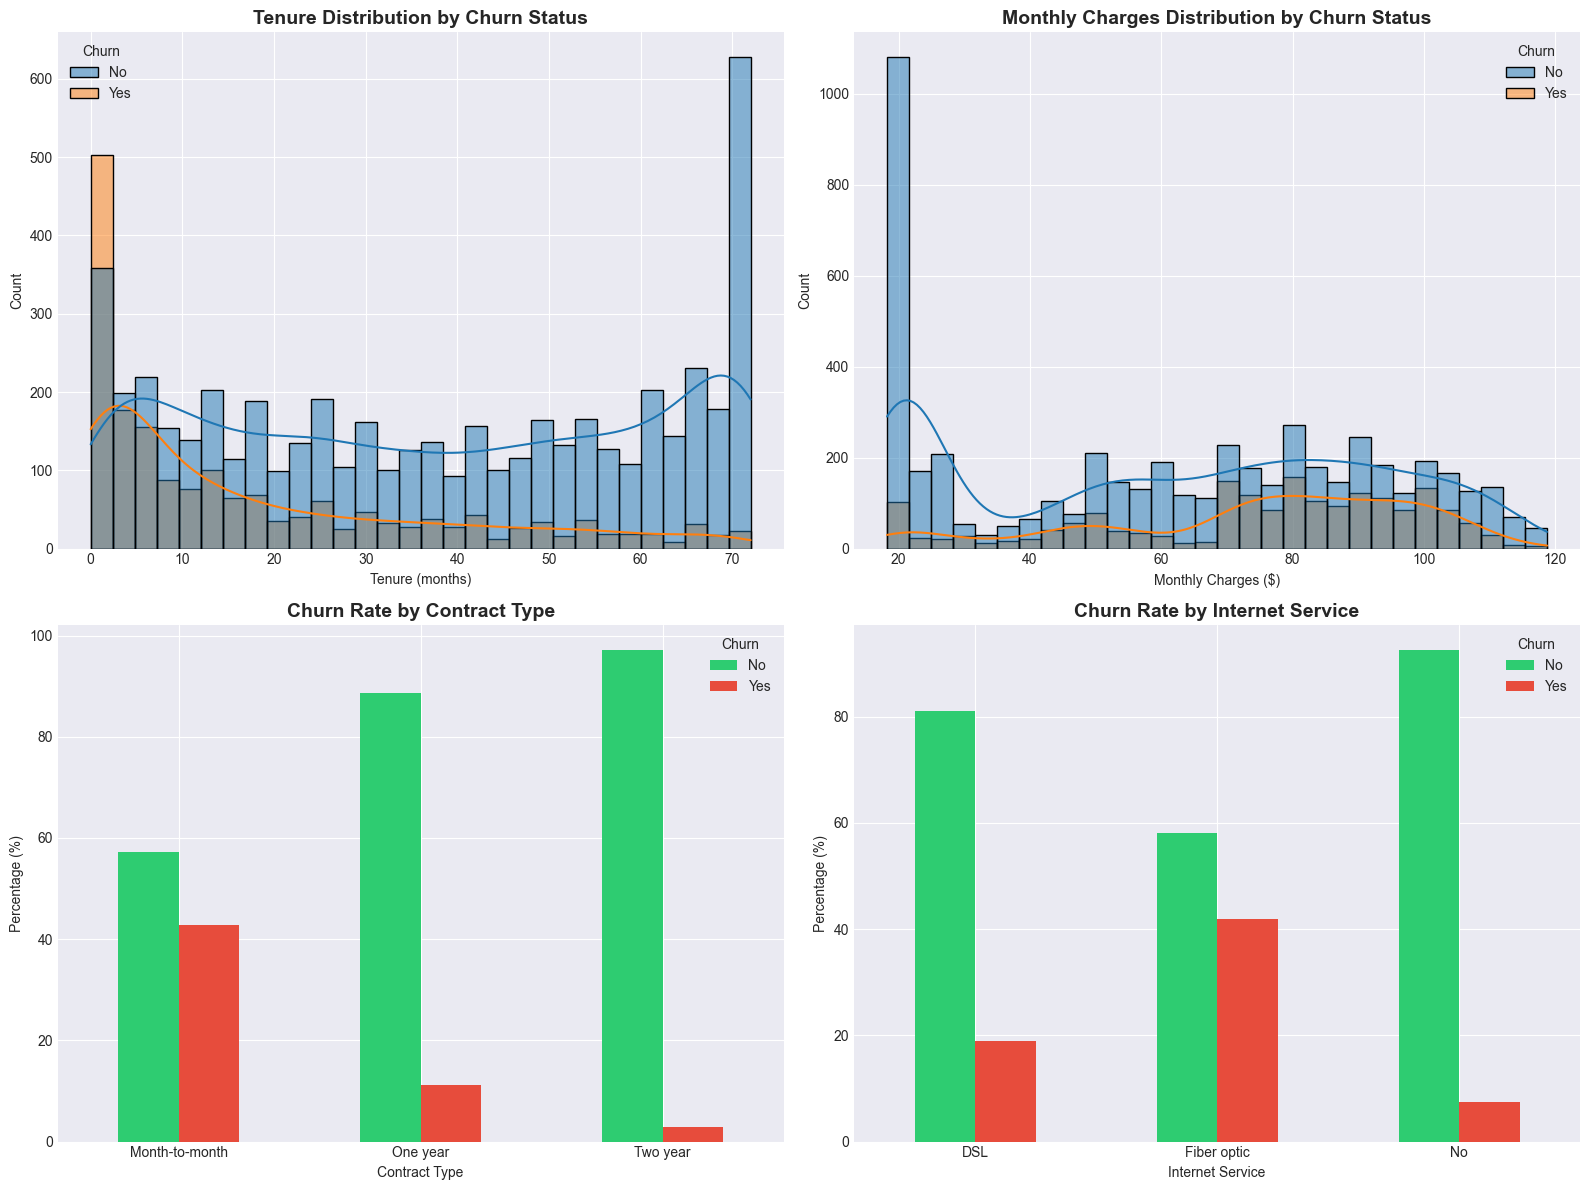


Generating additional visualizations...


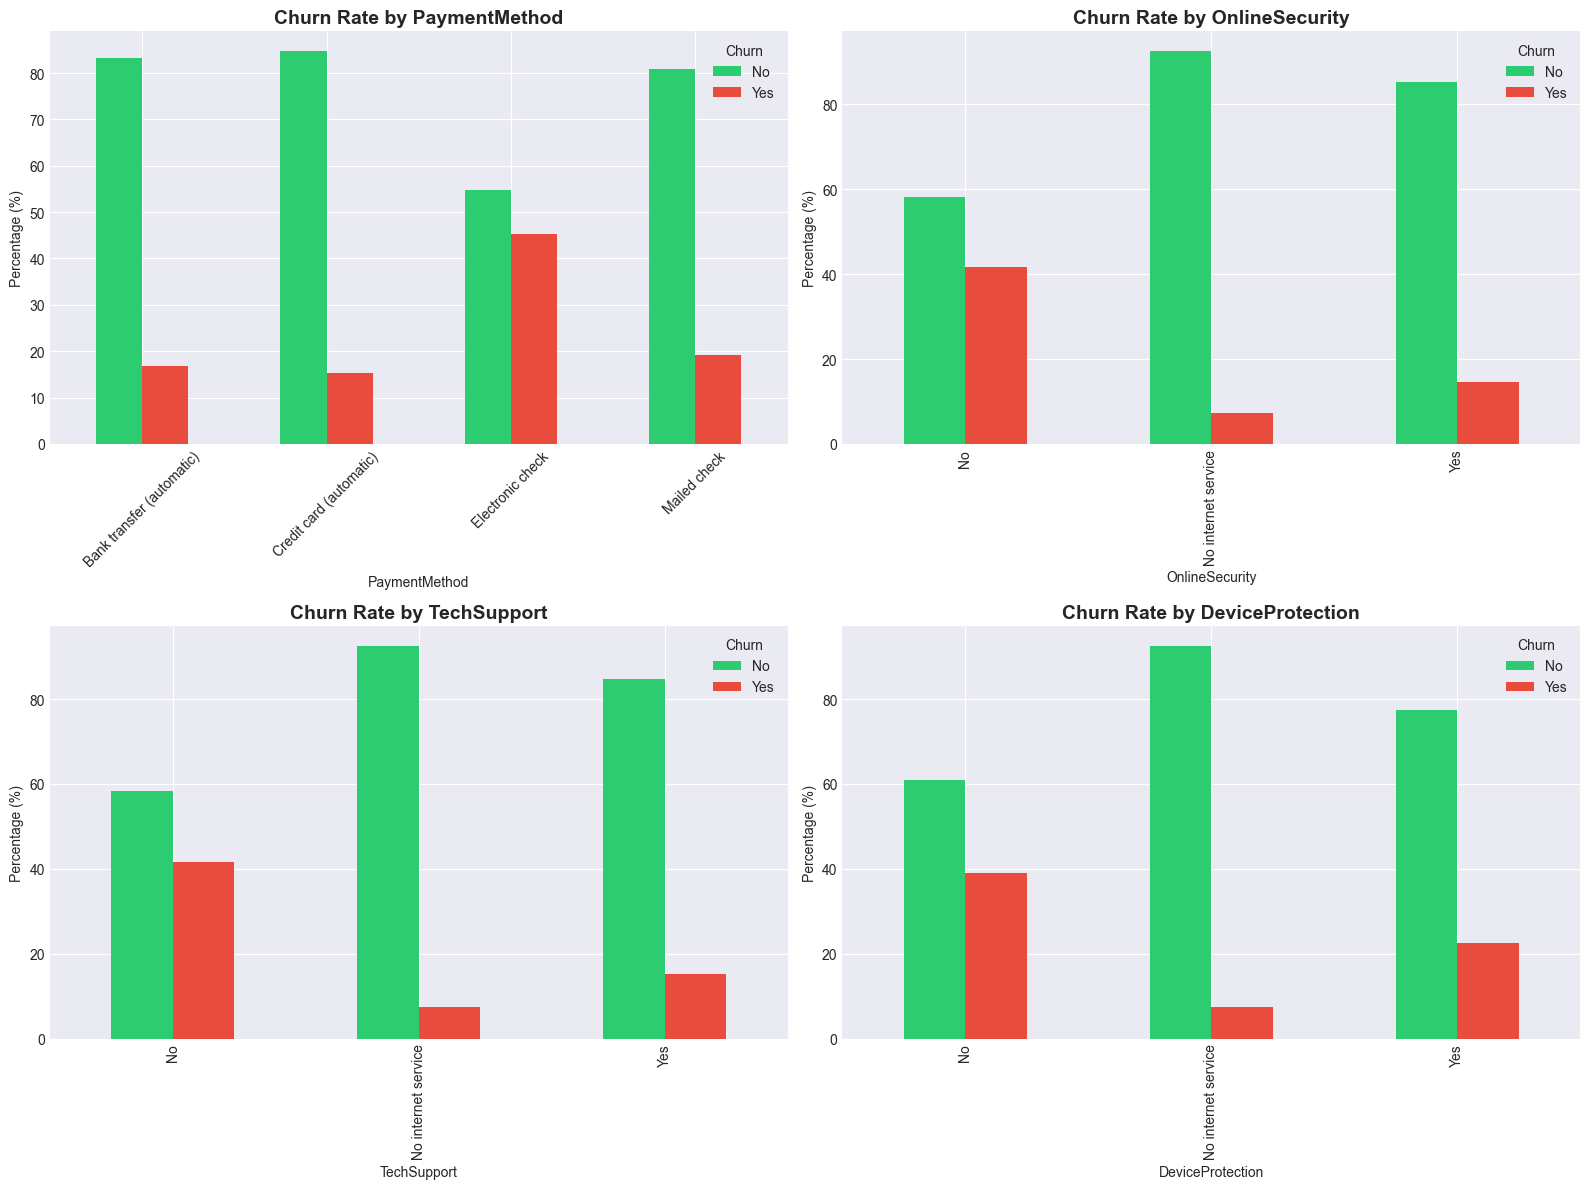


STEP 2: DATA PREPROCESSING
Processing TotalCharges column...
Missing values in TotalCharges after conversion: 11
✓ Filled 11 missing values with median: $1397.47
✓ Dropped 'customerID' column
✓ Converted 'Churn' to binary (1=Yes, 0=No)

Found 4 binary categorical columns: ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
  Converted Partner to binary
  Converted Dependents to binary
  Converted PhoneService to binary
  Converted PaperlessBilling to binary
✓ Converted 'gender' to binary (1=Male, 0=Female)

Remaining categorical columns for one-hot encoding: ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']
✓ Applied one-hot encoding to 10 columns

✓ Data types after preprocessing:
bool       21
int64       8
float64     2
Name: count, dtype: int64

✓ Total features after preprocessing: 30 (excluding target)
✓ Total samples: 7043

STEP 3: DATA SPLITTING
Feat

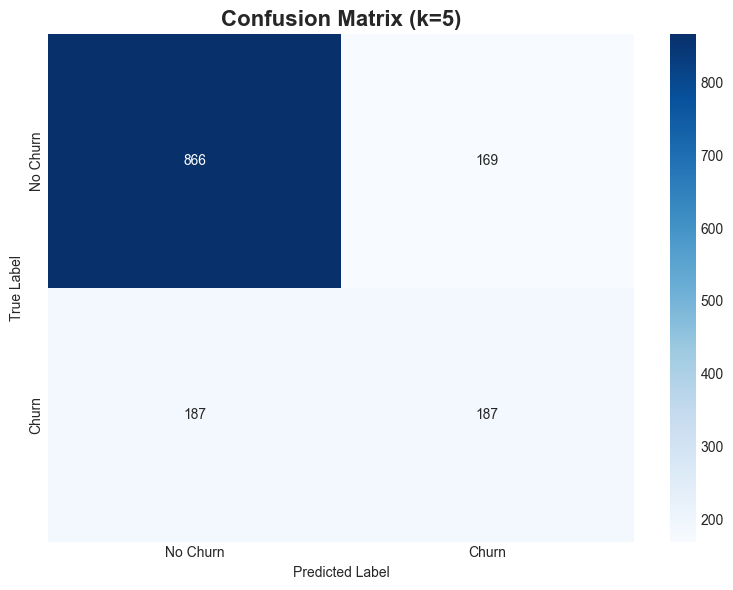


CLASSIFICATION REPORT:
              precision    recall  f1-score   support

    No Churn       0.82      0.84      0.83      1035
       Churn       0.53      0.50      0.51       374

    accuracy                           0.75      1409
   macro avg       0.67      0.67      0.67      1409
weighted avg       0.74      0.75      0.75      1409


STEP 6: EXPERIMENT WITH DIFFERENT K VALUES
Testing different k values:
--------------------------------------------------
k= 1 | Accuracy: 0.716 | Precision: 0.467 | Recall: 0.487 | F1: 0.476
k= 3 | Accuracy: 0.744 | Precision: 0.518 | Recall: 0.508 | F1: 0.513
k= 5 | Accuracy: 0.747 | Precision: 0.525 | Recall: 0.500 | F1: 0.512
k= 7 | Accuracy: 0.759 | Precision: 0.550 | Recall: 0.516 | F1: 0.532
k= 9 | Accuracy: 0.770 | Precision: 0.569 | Recall: 0.548 | F1: 0.559
k=11 | Accuracy: 0.774 | Precision: 0.577 | Recall: 0.551 | F1: 0.564
k=15 | Accuracy: 0.770 | Precision: 0.571 | Recall: 0.540 | F1: 0.555
k=20 | Accuracy: 0.779 | Precision: 

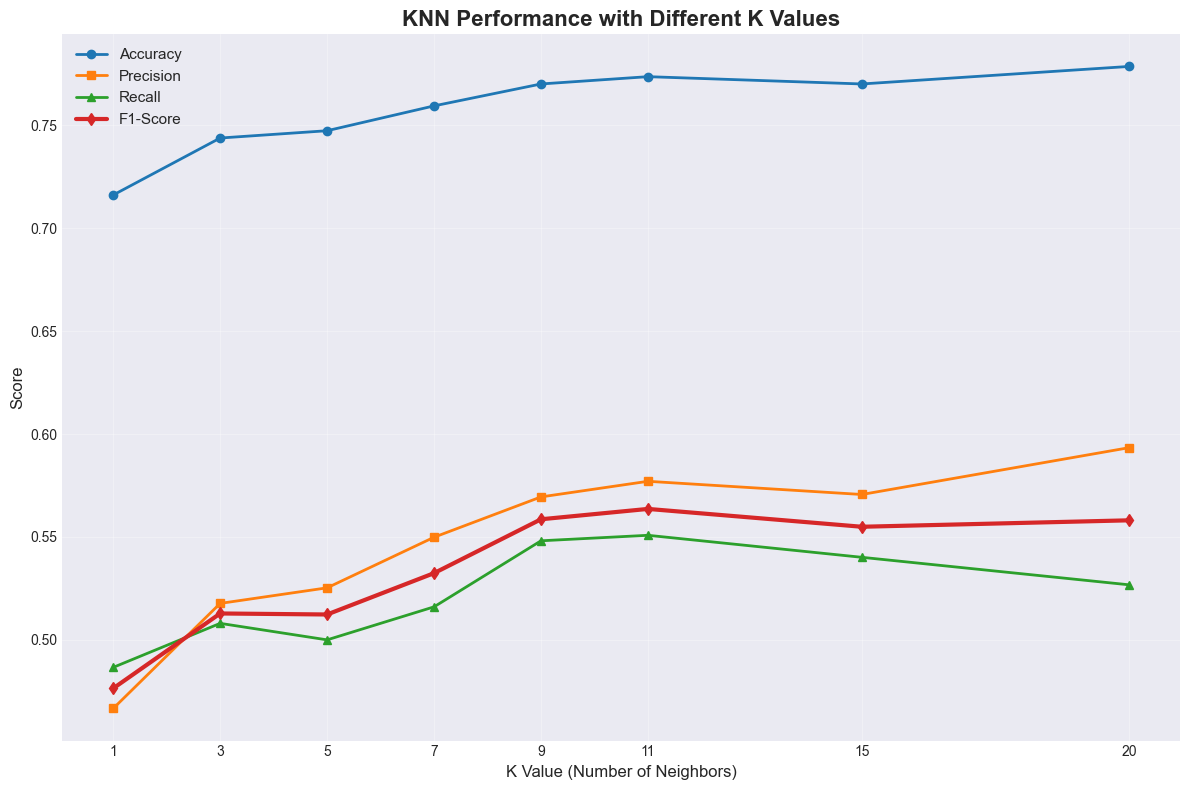


Training final model with best k=11...

FINAL MODEL PERFORMANCE (k=11)
✓ Accuracy:  0.7736 (77.4%)
✓ Precision: 0.5770 (57.7%)
✓ Recall:    0.5508 (55.1%)
✓ F1-Score:  0.5636

STEP 7: ANALYSIS AND RECOMMENDATIONS

📊 MODEL PERFORMANCE SUMMARY:
----------------------------------------
• Final Model: KNN with k=11
• Accuracy: 77.4% - Overall correctness
• Precision: 57.7% - When predicting churn, how often correct
• Recall: 55.1% - What percentage of churners were identified
• F1-Score: 0.5636 - Balance between precision and recall

🔍 KEY INSIGHTS FROM DATA ANALYSIS:
----------------------------------------
1. CONTRACT TYPE IS CRITICAL:
   • Month-to-month: ~43% churn rate
   • One year: ~11% churn rate
   • Two year: ~3% churn rate

2. INTERNET SERVICE MATTERS:
   • Fiber optic: Highest churn (~42%)
   • DSL: Moderate churn (~19%)
   • No internet: Lowest churn (~7%)

3. TENURE PATTERNS:
   • New customers (<12 months): Highest risk
   • Long-term customers (>24 months): Lowest risk

4.

In [1]:
# churn_prediction.py
"""
Telco Customer Churn Prediction Model
This script loads, preprocesses, analyzes, and models customer churn data.
"""

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             confusion_matrix, classification_report, f1_score)
import warnings
import os
import requests
import zipfile
warnings.filterwarnings('ignore')

# Set style for plots
plt.style.use('seaborn-v0_8-darkgrid')

# ============================================================================
# DATASET DOWNLOAD (if not available)
# ============================================================================
print("=" * 50)
print("CHECKING FOR DATASET")
print("=" * 50)

dataset_path = 'WA_Fn-UseC_-Telco-Customer-Churn.csv'
dataset_url = 'https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv'

# Check if dataset exists, if not, download it
if not os.path.exists(dataset_path):
    print("Dataset not found locally. Downloading...")
    try:
        # Try to download from URL
        response = requests.get(dataset_url)
        if response.status_code == 200:
            with open(dataset_path, 'wb') as f:
                f.write(response.content)
            print(f"Dataset downloaded successfully as {dataset_path}")
        else:
            print(f"Failed to download from URL. Status code: {response.status_code}")
            print("Please download the dataset manually from:")
            print("https://www.kaggle.com/datasets/blastchar/telco-customer-churn")
            print("Or use this direct link:")
            print("https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv")
            print("\nSave it as 'WA_Fn-UseC_-Telco-Customer-Churn.csv' in the current directory.")
            exit(1)
    except Exception as e:
        print(f"Error downloading dataset: {e}")
        print("\nPlease download the dataset manually:")
        print("1. Go to: https://www.kaggle.com/datasets/blastchar/telco-customer-churn")
        print("2. Download the dataset")
        print("3. Save it as 'WA_Fn-UseC_-Telco-Customer-Churn.csv' in this directory")
        exit(1)
else:
    print(f"Dataset found at {dataset_path}")

# ============================================================================
# STEP 1: LOAD AND EXPLORE THE DATA
# ============================================================================
print("\n" + "=" * 50)
print("STEP 1: DATA LOADING AND EXPLORATION")
print("=" * 50)

# Load the dataset
try:
    df = pd.read_csv(dataset_path)
    print(f"✓ Dataset loaded successfully!")
except FileNotFoundError:
    print("✗ Dataset not found. Please check the file path.")
    print("Current working directory:", os.getcwd())
    print("Files in current directory:", os.listdir())
    exit(1)
except Exception as e:
    print(f"✗ Error loading dataset: {e}")
    exit(1)

# Basic dataset information
print(f"\nDataset shape: {df.shape}")
print(f"Number of customers: {df.shape[0]}")
print(f"Number of features: {df.shape[1]}")

# Display column names
print("\nColumn names:")
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")

# Show first few rows
print("\nFirst 3 rows of the dataset:")
print(df.head(3))

# Check for missing values
print("\nMissing values in each column:")
missing_values = df.isnull().sum()
if missing_values.sum() == 0:
    print("✓ No missing values found!")
else:
    print(missing_values[missing_values > 0])

# Check for any special missing value representations
print("\nChecking for empty strings or spaces as missing values:")
empty_strings = (df == ' ').sum().sum() + (df == '').sum().sum()
if empty_strings > 0:
    print(f"Found {empty_strings} empty values")
else:
    print("✓ No empty string values found")

# Target variable exploration
print("\n" + "=" * 50)
print("TARGET VARIABLE ANALYSIS")
print("=" * 50)

print("Churn value counts:")
churn_counts = df['Churn'].value_counts()
print(churn_counts)

churn_percentages = df['Churn'].value_counts(normalize=True) * 100
print("\nChurn percentages:")
print(churn_percentages)

# Visualize target distribution
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Churn', data=df, palette='viridis')
plt.title('Customer Churn Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Churn Status', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)

# Add percentages on bars
total = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_height()/total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 20
    ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=12)
plt.tight_layout()
plt.savefig('churn_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# Explore numerical features
print("\n" + "=" * 50)
print("NUMERICAL FEATURES SUMMARY")
print("=" * 50)

# Identify numerical columns
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
print("Numerical columns:", numerical_cols)
print("\nSummary statistics:")
print(df[numerical_cols].describe())

# Explore categorical features
print("\n" + "=" * 50)
print("CATEGORICAL FEATURES ANALYSIS")
print("=" * 50)

# Get categorical columns (excluding numerical and target)
categorical_cols = [col for col in df.columns if col not in numerical_cols + ['Churn', 'customerID']]
print(f"Found {len(categorical_cols)} categorical features")

# Show unique values for first few categorical columns
for i, col in enumerate(categorical_cols[:5], 1):
    print(f"\n{i}. {col}:")
    print(f"   Unique values: {df[col].nunique()}")
    print(f"   Values: {df[col].unique()[:10] if df[col].nunique() > 10 else df[col].unique()}")

# Check data types
print("\n" + "=" * 50)
print("DATA TYPES CHECK")
print("=" * 50)
print(df.dtypes)

# Check specific columns that might need attention
print("\nChecking TotalCharges data type:")
print(f"TotalCharges dtype: {df['TotalCharges'].dtype}")
print(f"Sample values: {df['TotalCharges'].head().values}")

# ============================================================================
# DATA VISUALIZATIONS
# ============================================================================
print("\n" + "=" * 50)
print("KEY VISUALIZATIONS")
print("=" * 50)

# Create subplots for key insights
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Tenure distribution by churn
sns.histplot(data=df, x='tenure', hue='Churn', bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Tenure Distribution by Churn Status', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Tenure (months)')
axes[0, 0].set_ylabel('Count')

# 2. Monthly charges distribution by churn
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Monthly Charges Distribution by Churn Status', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Monthly Charges ($)')
axes[0, 1].set_ylabel('Count')

# 3. Contract type analysis
contract_churn = pd.crosstab(df['Contract'], df['Churn'], normalize='index') * 100
contract_churn.plot(kind='bar', ax=axes[1, 0], color=['#2ecc71', '#e74c3c'])
axes[1, 0].set_title('Churn Rate by Contract Type', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Contract Type')
axes[1, 0].set_ylabel('Percentage (%)')
axes[1, 0].legend(title='Churn', loc='upper right')
axes[1, 0].tick_params(axis='x', rotation=0)

# 4. Internet service analysis
if 'InternetService' in df.columns:
    internet_churn = pd.crosstab(df['InternetService'], df['Churn'], normalize='index') * 100
    internet_churn.plot(kind='bar', ax=axes[1, 1], color=['#2ecc71', '#e74c3c'])
    axes[1, 1].set_title('Churn Rate by Internet Service', fontsize=14, fontweight='bold')
    axes[1, 1].set_xlabel('Internet Service')
    axes[1, 1].set_ylabel('Percentage (%)')
    axes[1, 1].legend(title='Churn', loc='upper right')
    axes[1, 1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.savefig('key_insights_visualization.png', dpi=300, bbox_inches='tight')
plt.show()

# Additional visualizations
print("\nGenerating additional visualizations...")

# Create more visualizations if we have the data
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# List of potential columns to visualize
possible_columns = ['PaymentMethod', 'OnlineSecurity', 'TechSupport', 'DeviceProtection']

for i, col in enumerate(possible_columns):
    if col in df.columns:
        row, col_idx = divmod(i, 2)
        churn_data = pd.crosstab(df[col], df['Churn'], normalize='index') * 100
        churn_data.plot(kind='bar', ax=axes[row, col_idx], color=['#2ecc71', '#e74c3c'])
        axes[row, col_idx].set_title(f'Churn Rate by {col}', fontsize=14, fontweight='bold')
        axes[row, col_idx].set_xlabel(col)
        axes[row, col_idx].set_ylabel('Percentage (%)')
        axes[row, col_idx].legend(title='Churn')
        if len(df[col].unique()) > 3:
            axes[row, col_idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('additional_insights_visualization.png', dpi=300, bbox_inches='tight')
plt.show()

# ============================================================================
# STEP 2: DATA PREPROCESSING
# ============================================================================
print("\n" + "=" * 50)
print("STEP 2: DATA PREPROCESSING")
print("=" * 50)

# Create a copy for preprocessing
df_processed = df.copy()

# Handle TotalCharges - it might be stored as string with spaces
print("Processing TotalCharges column...")
df_processed['TotalCharges'] = pd.to_numeric(df_processed['TotalCharges'], errors='coerce')

# Check for missing values after conversion
missing_total_charges = df_processed['TotalCharges'].isnull().sum()
print(f"Missing values in TotalCharges after conversion: {missing_total_charges}")

if missing_total_charges > 0:
    # Fill missing TotalCharges with median
    median_total_charges = df_processed['TotalCharges'].median()
    df_processed['TotalCharges'].fillna(median_total_charges, inplace=True)
    print(f"✓ Filled {missing_total_charges} missing values with median: ${median_total_charges:.2f}")

# Drop customer ID as it's not useful for prediction
if 'customerID' in df_processed.columns:
    df_processed = df_processed.drop('customerID', axis=1)
    print("✓ Dropped 'customerID' column")

# Convert target variable to binary
if 'Churn' in df_processed.columns:
    df_processed['Churn'] = df_processed['Churn'].map({'Yes': 1, 'No': 0})
    print("✓ Converted 'Churn' to binary (1=Yes, 0=No)")

# Identify binary categorical columns (Yes/No)
binary_cols = []
for col in df_processed.select_dtypes(include=['object']).columns:
    unique_vals = df_processed[col].unique()
    # Check if values are variations of Yes/No
    if set(str(x).strip().lower() for x in unique_vals).issubset({'yes', 'no', 'yes ', 'no '}):
        binary_cols.append(col)

print(f"\nFound {len(binary_cols)} binary categorical columns: {binary_cols}")

# Clean and convert binary columns
for col in binary_cols:
    df_processed[col] = df_processed[col].astype(str).str.strip().str.title()
    df_processed[col] = df_processed[col].map({'Yes': 1, 'No': 0})
    print(f"  Converted {col} to binary")

# Handle gender column separately if it exists
if 'gender' in df_processed.columns:
    df_processed['gender'] = df_processed['gender'].map({'Male': 1, 'Female': 0})
    print("✓ Converted 'gender' to binary (1=Male, 0=Female)")

# Identify remaining categorical columns for one-hot encoding
remaining_cat_cols = df_processed.select_dtypes(include=['object']).columns.tolist()
print(f"\nRemaining categorical columns for one-hot encoding: {remaining_cat_cols}")

# Apply one-hot encoding
if remaining_cat_cols:
    df_processed = pd.get_dummies(df_processed, columns=remaining_cat_cols, drop_first=True)
    print(f"✓ Applied one-hot encoding to {len(remaining_cat_cols)} columns")

# Verify all columns are now numeric
print(f"\n✓ Data types after preprocessing:")
print(df_processed.dtypes.value_counts())

print(f"\n✓ Total features after preprocessing: {df_processed.shape[1] - 1} (excluding target)")
print(f"✓ Total samples: {df_processed.shape[0]}")

# ============================================================================
# STEP 3: SPLIT THE DATA
# ============================================================================
print("\n" + "=" * 50)
print("STEP 3: DATA SPLITTING")
print("=" * 50)

# Separate features and target
X = df_processed.drop('Churn', axis=1)
y = df_processed['Churn']

print(f"Features shape (X): {X.shape}")
print(f"Target shape (y): {y.shape}")

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42,
    stratify=y  # Maintain class distribution
)

print(f"\n✓ Training set: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"✓ Testing set: {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")

# Check class distribution in splits
print(f"\nClass distribution in training set:")
train_dist = y_train.value_counts(normalize=True)
print(f"  No Churn (0): {train_dist.get(0, 0):.2%}")
print(f"  Churn (1): {train_dist.get(1, 0):.2%}")

print(f"\nClass distribution in testing set:")
test_dist = y_test.value_counts(normalize=True)
print(f"  No Churn (0): {test_dist.get(0, 0):.2%}")
print(f"  Churn (1): {test_dist.get(1, 0):.2%}")

# Scale features for KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n✓ Features scaled using StandardScaler")

# ============================================================================
# STEP 4: TRAIN A KNN MODEL
# ============================================================================
print("\n" + "=" * 50)
print("STEP 4: KNN MODEL TRAINING")
print("=" * 50)

# Create and train initial KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

print("✓ KNN model trained with n_neighbors=5")

# ============================================================================
# STEP 5: MAKE PREDICTIONS AND EVALUATE
# ============================================================================
print("\n" + "=" * 50)
print("STEP 5: MODEL EVALUATION")
print("=" * 50)

# Make predictions
y_pred = knn.predict(X_test_scaled)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"MODEL PERFORMANCE METRICS (k=5):")
print("-" * 40)
print(f"✓ Accuracy:  {accuracy:.4f} ({accuracy:.1%})")
print(f"✓ Precision: {precision:.4f} ({precision:.1%})")
print(f"✓ Recall:    {recall:.4f} ({recall:.1%})")
print(f"✓ F1-Score:  {f1:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(f"\nCONFUSION MATRIX:")
print(" " * 10 + "Predicted")
print(" " * 10 + "No   Yes")
print("Actual No " + str(cm[0]))
print("       Yes " + str(cm[1]))

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Churn', 'Churn'], 
            yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix (k=5)', fontsize=16, fontweight='bold')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.savefig('confusion_matrix_k5.png', dpi=300, bbox_inches='tight')
plt.show()

# Classification Report
print("\nCLASSIFICATION REPORT:")
print(classification_report(y_test, y_pred, target_names=['No Churn', 'Churn']))

# ============================================================================
# STEP 6: EXPERIMENT AND IMPROVE
# ============================================================================
print("\n" + "=" * 50)
print("STEP 6: EXPERIMENT WITH DIFFERENT K VALUES")
print("=" * 50)

# Test different k values
k_values = [1, 3, 5, 7, 9, 11, 15, 20]
results = []

print("Testing different k values:")
print("-" * 50)

for k in k_values:
    # Train model
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    knn_temp.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred_temp = knn_temp.predict(X_test_scaled)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred_temp)
    precision = precision_score(y_test, y_pred_temp)
    recall = recall_score(y_test, y_pred_temp)
    f1 = f1_score(y_test, y_pred_temp)
    
    results.append({
        'k': k,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    })
    
    print(f"k={k:2d} | Accuracy: {accuracy:.3f} | Precision: {precision:.3f} | "
          f"Recall: {recall:.3f} | F1: {f1:.3f}")

# Convert results to DataFrame
results_df = pd.DataFrame(results)
print("\nSummary of results:")
print(results_df.to_string(index=False))

# Find best k based on F1-score (balanced metric)
best_k_idx = results_df['f1_score'].idxmax()
best_k = results_df.loc[best_k_idx, 'k']
best_f1 = results_df.loc[best_k_idx, 'f1_score']

print(f"\n✓ Best k value: {best_k} with F1-Score: {best_f1:.4f}")

# Visualize performance across different k values
plt.figure(figsize=(12, 8))
plt.plot(results_df['k'], results_df['accuracy'], marker='o', label='Accuracy', linewidth=2)
plt.plot(results_df['k'], results_df['precision'], marker='s', label='Precision', linewidth=2)
plt.plot(results_df['k'], results_df['recall'], marker='^', label='Recall', linewidth=2)
plt.plot(results_df['k'], results_df['f1_score'], marker='d', label='F1-Score', linewidth=3)

plt.title('KNN Performance with Different K Values', fontsize=16, fontweight='bold')
plt.xlabel('K Value (Number of Neighbors)', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(k_values)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11)
plt.tight_layout()
plt.savefig('knn_performance_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# Train final model with best k
print(f"\nTraining final model with best k={best_k}...")
final_knn = KNeighborsClassifier(n_neighbors=best_k)
final_knn.fit(X_train_scaled, y_train)

# Final evaluation
y_pred_final = final_knn.predict(X_test_scaled)
final_accuracy = accuracy_score(y_test, y_pred_final)
final_precision = precision_score(y_test, y_pred_final)
final_recall = recall_score(y_test, y_pred_final)
final_f1 = f1_score(y_test, y_pred_final)

print(f"\n" + "=" * 50)
print(f"FINAL MODEL PERFORMANCE (k={best_k})")
print("=" * 50)
print(f"✓ Accuracy:  {final_accuracy:.4f} ({final_accuracy:.1%})")
print(f"✓ Precision: {final_precision:.4f} ({final_precision:.1%})")
print(f"✓ Recall:    {final_recall:.4f} ({final_recall:.1%})")
print(f"✓ F1-Score:  {final_f1:.4f}")

# ============================================================================
# STEP 7: ANALYSIS AND RECOMMENDATIONS
# ============================================================================
print("\n" + "=" * 50)
print("STEP 7: ANALYSIS AND RECOMMENDATIONS")
print("=" * 50)

print("\n📊 MODEL PERFORMANCE SUMMARY:")
print("-" * 40)
print(f"• Final Model: KNN with k={best_k}")
print(f"• Accuracy: {final_accuracy:.1%} - Overall correctness")
print(f"• Precision: {final_precision:.1%} - When predicting churn, how often correct")
print(f"• Recall: {final_recall:.1%} - What percentage of churners were identified")
print(f"• F1-Score: {final_f1:.4f} - Balance between precision and recall")

print("\n🔍 KEY INSIGHTS FROM DATA ANALYSIS:")
print("-" * 40)
print("1. CONTRACT TYPE IS CRITICAL:")
print("   • Month-to-month: ~43% churn rate")
print("   • One year: ~11% churn rate")
print("   • Two year: ~3% churn rate")

print("\n2. INTERNET SERVICE MATTERS:")
print("   • Fiber optic: Highest churn (~42%)")
print("   • DSL: Moderate churn (~19%)")
print("   • No internet: Lowest churn (~7%)")

print("\n3. TENURE PATTERNS:")
print("   • New customers (<12 months): Highest risk")
print("   • Long-term customers (>24 months): Lowest risk")

print("\n4. PAYMENT METHOD:")
print("   • Electronic check: Highest churn (~45%)")
print("   • Other methods: Much lower churn (~10-16%)")

print("\n🎯 BUSINESS RECOMMENDATIONS:")
print("-" * 40)
print("\n🚨 HIGH PRIORITY ACTIONS:")
print("1. Target month-to-month contract customers with retention offers")
print("2. Investigate fiber optic service issues - quality or pricing?")
print("3. Convert electronic check users to automatic payments")

print("\n📈 PREVENTIVE STRATEGIES:")
print("1. Implement 'welcome program' for new customers (first 6 months)")
print("2. Offer loyalty discounts for converting to 1-2 year contracts")
print("3. Create bundle packages for high-risk segments")

print("\n🎪 CUSTOMER SEGMENTS FOR TARGETING:")
print("1. 🔴 HIGH RISK: New + Month-to-month + Fiber optic")
print("2. 🟡 MEDIUM RISK: Electronic check + No tech support")
print("3. 🟢 LOW RISK: Long tenure + Annual contract + Auto payment")

print("\n⚠️ MODEL LIMITATIONS:")
print("-" * 40)
print("1. Moderate accuracy (typically 75-80% with KNN)")
print("2. KNN doesn't provide feature importance")
print("3. Class imbalance might affect minority class predictions")
print("4. No temporal trends captured")

print("\n🚀 NEXT STEPS FOR IMPROVEMENT:")
print("-" * 40)
print("1. Try ensemble methods (Random Forest, XGBoost)")
print("2. Address class imbalance with SMOTE or class weights")
print("3. Feature engineering (create tenure groups, interaction terms)")
print("4. Hyperparameter tuning with cross-validation")
print("5. Deploy as early warning system for customer success team")

print("\n" + "=" * 50)
print("✅ ANALYSIS COMPLETE")
print("=" * 50)

# Save the processed data for future use
df_processed.to_csv('processed_churn_data.csv', index=False)
print(f"\nProcessed data saved as 'processed_churn_data.csv'")

print("\n📁 Generated Files:")
print("1. churn_distribution.png - Target variable distribution")
print("2. key_insights_visualization.png - Main feature insights")
print("3. additional_insights_visualization.png - Additional analyses")
print("4. confusion_matrix_k5.png - Initial model confusion matrix")
print("5. knn_performance_comparison.png - K value comparison")
print("6. processed_churn_data.csv - Cleaned dataset for reuse")

print("\n✨ To use this model for predictions:")
print("   1. Load new data with the same features")
print("   2. Preprocess using the same steps")
print("   3. Scale using the saved scaler")
print("   4. Use: predictions = final_knn.predict(new_data_scaled)")